# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [52]:
# insert your code here
da['SMQ020x'] = da['SMQ020'].replace({1:'Yes',2:'No'})
da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male',2:'Female'})
db = da[['SMQ020x','RIAGENDRx']].dropna()
dx_males = db[db['RIAGENDRx']=='Male']
dx_male_smoke = dx_males[dx_males['SMQ020x']=='Yes']
dx_females = db[db['RIAGENDRx']=='Female']
dx_female_smoke = dx_females[dx_females['SMQ020x']=='Yes']
print(len(dx_male_smoke),len(dx_males),len(dx_female_smoke),len(dx_females))
sm.stats.test_proportions_2indep(len(dx_male_smoke),len(dx_males),len(dx_female_smoke),len(dx_females))

1413 2759 906 2976


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 16.327267529454826
pvalue = 6.315004663556651e-60
compare = 'diff'
method = 'agresti-caffo'
diff = 0.20770659659296842
ratio = 1.6822680258947837
odds_ratio = 2.3984973874024575
variance = 0.00016161711364520115
alternative = 'two-sided'
value = 0
tuple = (16.327267529454826, 6.315004663556651e-60)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

from the p-value of 6.315e-60 being lower than the significance value of 0.05, we have sufficient evidence to support that both proportions of males and females who smoke are equal

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [66]:
# insert your code here
print(sm.stats.proportion_confint(len(dx_male_smoke),len(dx_males)))
print(sm.stats.proportion_confint(len(dx_female_smoke),len(dx_females)))
p_male = len(dx_male_smoke)/len(dx_males)
se_male = np.sqrt((p_male*(1-p_male))/len(dx_males))
p_female = len(dx_female_smoke)/len(dx_females)
se_female = np.sqrt((p_female*(1-p_female))/len(dx_females))
p_diff = p_female - p_male
se_diff = np.sqrt(se_female**2 + se_male**2)
lcb = p_diff - 1.96 * se_diff
ucb = p_diff + 1.96 * se_diff
print(lcb,ucb)

(0.49349056386167417, 0.5307935970661982)
(0.2879026244757051, 0.3209683432662304)
-0.2326312298280253 -0.18278196335791153


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

for the confidence interval of the smoking rates between men and women, we can see that zero(0) is not within the confidence interval which further supports our claim that the difference in the proportion of female who smoke and male who smoke is not zero

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [67]:
# insert your code here
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1.0:'not completed college',2.0:'not completed college',3.0:'not completed college',
                                          4.0:'not completed college',5.0:'College graduate',7.0:np.nan,9.0:np.nan})

College = da['BMXHT'].dropna()[da['DMDEDUC2x']=='not completed college']
No_college = da['BMXHT'].dropna()[da['DMDEDUC2x']=='College graduate']
print(sm.stats.ztest(College,No_college))

da['BMXHTx'] = da['BMXHT']/2.54
Inch_College = da['BMXHTx'].dropna()[da['DMDEDUC2x']=='not completed college']
Inch_No_college = da['BMXHTx'].dropna()[da['DMDEDUC2x']=='College graduate']
print(sm.stats.ztest(Inch_College,Inch_No_college))

(-7.569245765210209, 3.7539736083220206e-14)
(-7.569245765210218, 3.753973608321762e-14)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

With our p-value of 3.75e-14 less than our significance level of 0.05, we have sufficient evidence to conclude that the average heights of college graduates are different from the heights of those who haven't completed college

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

It tells us that units of measurements do not influence hypothesis testing

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [62]:
# insert your code here
df = da[da['RIAGENDRx']=='Male']
dc = df['BMXBMI'].dropna()[(df['RIDAGEYR']>=30) & (df['RIDAGEYR']<=40)]
dd = df['BMXBMI'].dropna()[(df['RIDAGEYR']>=50) & (df['RIDAGEYR']<=60)]
print(sm.stats.ztest(dc,dd))
dclog = np.log(df['BMXBMI'].dropna()[(df['RIDAGEYR']>=30) & (df['RIDAGEYR']<=40)])
ddlog = np.log(df['BMXBMI'].dropna()[(df['RIDAGEYR']>=50) & (df['RIDAGEYR']<=60)])
print(sm.stats.ztest(dclog,ddlog))

(0.8984008016755222, 0.36897190924214873)
(0.7057844184100666, 0.4803222133688403)


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

With our p-value being more than the significance level, we have enough evidence to support that the average BMI of both age groups are equal

We can see that taking the log of the data actually changes the p-value of the measurements. Unlike a change in units (which is a linear change), a non-linear change, like taking the log, actually changes the intrepretation of the data and thus it changes the analysis we are performing.

For the non-log data (normal data) we are asking if the measures of BMI are the same or different across groups.
For the log-data (transformed data) we are asking if the magnitude of the measures of BMI are the same or different across groups.
Each question, and analysis, has its place and there are motivations for doing one or the other depending on the question that you are trying to answer with statistics.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

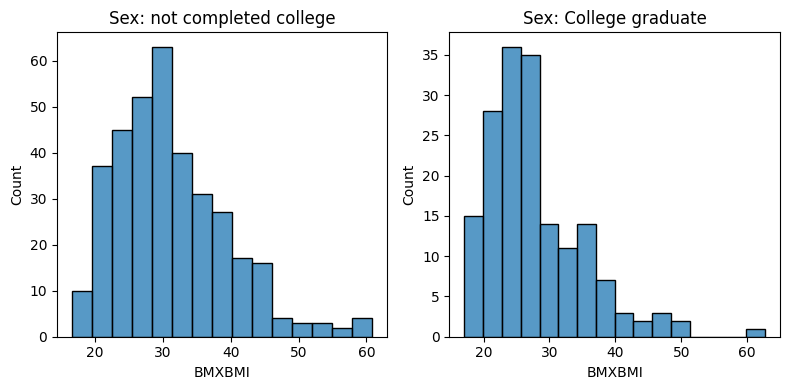

(-4.833662355599101, 1.962057858215408e-06, 373.1691835695285)
(-4.643908450956424, 4.329847689653882e-06, 523.0)


In [110]:
# insert your code here
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1.0:'not completed college',2.0:'not completed college',3.0:'not completed college',
                                          4.0:'not completed college',5.0:'College graduate',7.0:np.nan,9.0:np.nan})
dg = da[da['RIAGENDRx']=='Female']
dh = dg[(dg['RIDAGEYR']>=30) & (dg['RIDAGEYR']<=40)]
categories = dh['DMDEDUC2x'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(8, 4))
for ax, category in zip(axes, categories):
    subset = dh[dh["DMDEDUC2x"] == category]
    sns.histplot(subset["BMXBMI"], ax=ax)
    ax.set_title(f"Sex: {category}")
plt.tight_layout()
plt.show()
dh_college_bmi = dh['BMXBMI'].dropna()[dh['DMDEDUC2x']=='College graduate'] 
dh_no_college_bmi = dh['BMXBMI'].dropna()[dh['DMDEDUC2x']=='not completed college'] 

cm = sm.stats.CompareMeans.from_data(dh_college_bmi,dh_no_college_bmi)
print(cm.ttest_ind(usevar='unequal'))
print(cm.ttest_ind(usevar='pooled'))

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [147]:
# insert your code here
# Align the data by dropping rows where either BPXDI1 or BPXDI2 is NaN
di = da[['BPXDI1', 'BPXDI2']].dropna()

# Perform the difference between BPXDI1 and BPXDI2
dj = di['BPXDI1'] - di['BPXDI2']

# Z-test for the differences
z_stat, p_value = sm.stats.ztest(dj)
print("Z-test result:")
print(f"Z-statistic: {z_stat}, p-value: {p_value}")

Z-test result:
Z-statistic: 4.140387087476751, p-value: 3.467202439743513e-05


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modify the analysis above as appropriate for this setting.

In [149]:
# insert your code here
import scipy.stats

# T-test for the same data (assuming unequal variances)
ttest_results = scipy.stats.ttest_ind(di['BPXDI1'], di['BPXDI2'], equal_var=False, nan_policy="omit")
print("T-test result:")
print(f"T-statistic: {ttest_results.statistic}, p-value: {ttest_results.pvalue}")

T-test result:
T-statistic: 1.405785955157218, p-value: 0.15981663277442168


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceding two parts of the question differ.